In [13]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from evrp_gdg.utils.utilities import create_optimal_edges, create_json_out, update_instance_json, read_instance_json_str, convert_txt_instances_to_csv
from evrp_gdg.utils.plot import plot_interactive_graph, plot_evrptwv2g
from evrp_gdg.milp.evrptw import EVRPTW

import pandas as pd
import numpy as np

import json

pd.options.plotting.backend = "plotly"

 # Full solve

Objective options: {Schneider} OR {OpEx CapEx Cycle EA DCM Delivery}

Constraint options: {Start=End FullStart=End NoXkappaBounds NoMinVehicles NoSymmetry NoXd}

In [20]:
# instance = 'c101C10_'
instance = 'c103C5_'
fpath = 'config/test_instances/' + instance + '.csv'

In [94]:
m = EVRPTW(problem_type='Distance OpEx CapEx EA')
m.full_solve(fpath)

2021-04-23 00:58:01 INFO     Building abstract model
2021-04-23 00:58:01 INFO     Defining parameters and sets
2021-04-23 00:58:01 INFO     Defining variables
2021-04-23 00:58:01 INFO     Defining constraints
2021-04-23 00:58:01 INFO     Importing EVRPTW MILP instance: c103C5_
2021-04-23 00:58:01 INFO     Reading CSV
2021-04-23 00:58:01 INFO     Creating graph
2021-04-23 00:58:01 INFO     Creating timeseries data
2021-04-23 00:58:01 INFO     Creating duplicates and extended graph
2021-04-23 00:58:01 INFO     Using Scipy euclidian distances to generate distance matrix
2021-04-23 00:58:01 INFO     Calculating distance matrix
2021-04-23 00:58:01 INFO     Creating parameters
2021-04-23 00:58:01 INFO     Creating instance
2021-04-23 00:58:03 INFO     Problem type: Distance OpEx CapEx EA
2021-04-23 00:58:03 INFO     Solving instance...


Using license file C:\gurobi910\win64\gurobi.lic
Academic license - for non-commercial use only - expires 2021-06-13
Read LP format model from file C:\Users\berwa\AppData\Local\Temp\tmpnuxf7v9_.pyomo.lp
Reading time = 0.35 seconds
x1323: 5170 rows, 1323 columns, 212666 nonzeros
Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5170 rows, 1323 columns and 212666 nonzeros
Model fingerprint: 0xbb6ce9e5
Variable types: 648 continuous, 675 integer (675 binary)
Coefficient statistics:
  Matrix range     [3e-01, 1e+03]
  Objective range  [4e-01, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 3174 rows and 12 columns
Presolve time: 0.45s
Presolved: 1996 rows, 1311 columns, 101906 nonzeros
Variable types: 643 continuous, 668 integer (666 binary)
Found heuris

2021-04-23 00:58:09 INFO     Done


In [22]:
# print(m.results)

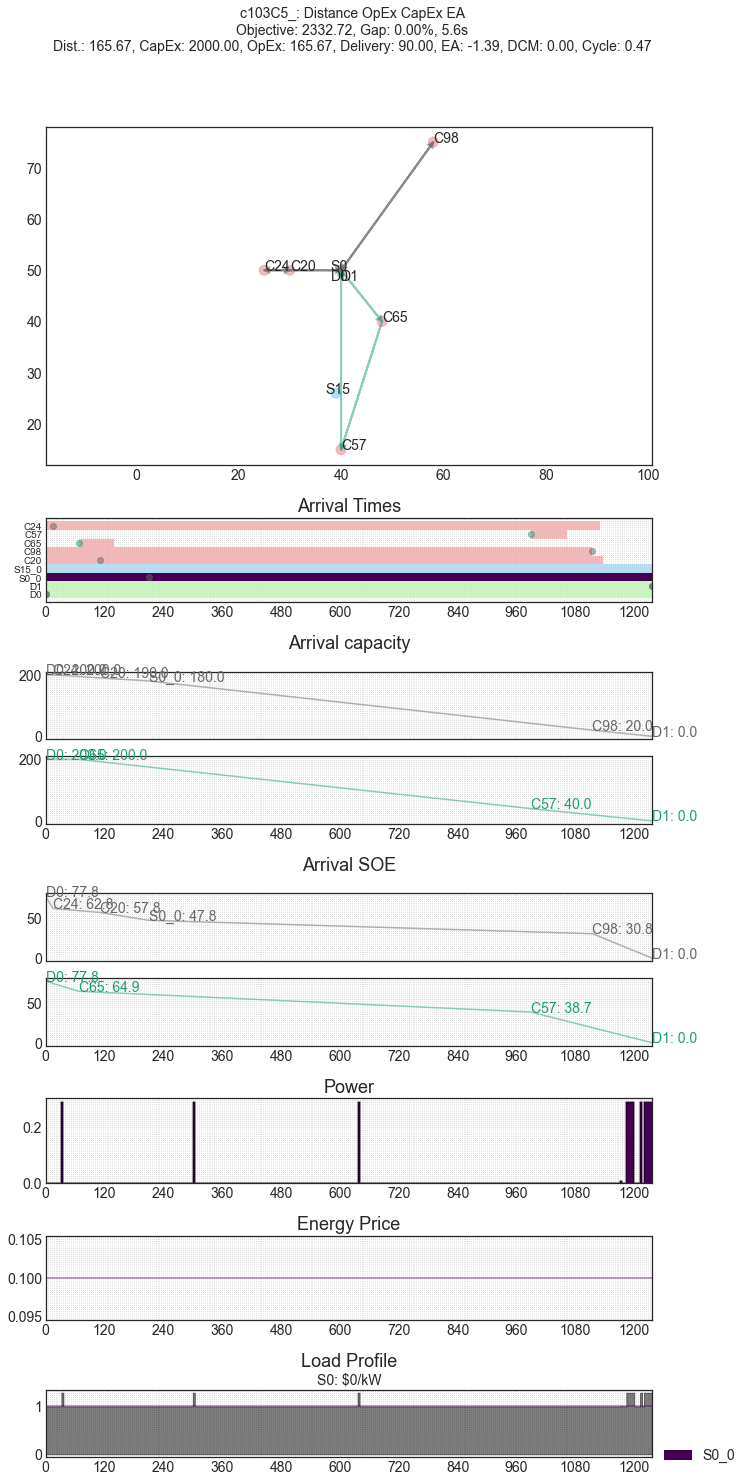

In [95]:
x, xp, traces, routes = plot_evrptwv2g(m, save=False)

In [83]:
routes

state           xw     xq         xa
from to                                        
D0   D0      NaN     0.000000  200.0  77.750000
     C98     1.0    30.805844   40.0  45.820253
     C65     1.0    67.000000   50.0  64.943752
C98  S0_0    1.0   151.611687   20.0  15.014409
C65  C57     1.0   989.000000   40.0  38.694942
S0_0 C24     1.0  1015.000000   20.0  15.000000
C24  C20     1.0  1110.000000   10.0  10.000000
C20  D1      1.0  1236.000000    0.0   0.000000
C57  D1      1.0  1236.000000    0.0   0.000000

In [85]:
x = getattr(m.instance, 'xgamma')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('D0', 'C98'), 1.0),
 (('D0', 'C65'), 1.0),
 (('S0_0', 'C24'), 1.0),
 (('C20', 'D1'), 1.0),
 (('C98', 'S0_0'), 1.0),
 (('C65', 'C57'), 1.0),
 (('C57', 'D1'), 1.0),
 (('C24', 'C20'), 1.0)]

In [86]:
x = getattr(m.instance, 'xkappa')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('S0_0', 212), 1.0),
 (('S0_0', 216), 1.0),
 (('S0_0', 220), 1.0),
 (('S0_0', 224), 1.0),
 (('S0_0', 228), 1.0),
 (('S0_0', 232), 1.0),
 (('S0_0', 236), 1.0),
 (('S0_0', 240), 1.0),
 (('S0_0', 244), 1.0),
 (('S0_0', 248), 1.0),
 (('S0_0', 256), 1.0),
 (('S0_0', 260), 1.0),
 (('S0_0', 264), 1.0),
 (('S0_0', 272), 1.0),
 (('S0_0', 280), 1.0),
 (('S0_0', 296), 1.0),
 (('S0_0', 304), 1.0),
 (('S0_0', 312), 1.0),
 (('S0_0', 352), 1.0),
 (('S0_0', 368), 1.0),
 (('S0_0', 380), 1.0),
 (('S0_0', 384), 1.0),
 (('S0_0', 392), 1.0),
 (('S0_0', 400), 1.0),
 (('S0_0', 416), 1.0),
 (('S0_0', 428), 1.0),
 (('S0_0', 484), 1.0),
 (('S0_0', 508), 1.0),
 (('S0_0', 536), 1.0),
 (('S0_0', 656), 1.0),
 (('S0_0', 684), 1.0),
 (('S0_0', 696), 1.0),
 (('S0_0', 732), 1.0),
 (('S0_0', 760), 1.0),
 (('S0_0', 768), 1.0),
 (('S0_0', 804), 1.0),
 (('S0_0', 836), 1.0),
 (('S0_0', 840), 1.0),
 (('S0_0', 864), 1.0),
 (('S0_0', 868), 1.0),
 (('S0_0', 876), 1.0),
 (('S0_0', 896), 1.0),
 (('S0_0', 908), 1.0),
 (('S0_0', 

In [90]:
# m.instance.xw.pprint()

In [93]:
x = getattr(m.instance, 'xp')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] > 0]
active_arcs

[(('S0_0', 212), 0.007208544749312762),
 (('S0_0', 768), 0.288184438),
 (('S0_0', 804), 0.288184438),
 (('S0_0', 836), 0.288184438),
 (('S0_0', 840), 0.288184438),
 (('S0_0', 864), 0.288184438),
 (('S0_0', 868), 0.288184438),
 (('S0_0', 876), 0.288184438),
 (('S0_0', 896), 0.288184438),
 (('S0_0', 908), 0.288184438),
 (('S0_0', 940), 0.288184438),
 (('S0_0', 948), 0.288184438),
 (('S0_0', 1008), 0.288184438)]

In [57]:
m.data['d']

,D0,D1,S0_0,S1_0,S3_0,S16_0,S20_0,C98,C78,C4,C13,C95,C100,C54,C27,C89,C96
D0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
D1,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S0_0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S1_0,37.054015,37.054015,37.054015,0.000000,36.055513,52.697249,18.357560,29.832868,20.248457,38.483763,59.615434,31.764760,39.661064,54.671748,54.000000,15.231546,32.756679
S3_0,36.235342,36.235342,36.235342,36.055513,0.000000,74.545288,53.075418,7.071068,56.302753,20.518285,35.693137,5.385165,3.605551,73.545904,45.343136,24.738634,3.605551
S16_0,42.755117,42.755117,42.755117,52.697249,74.545288,0.000000,57.008771,67.742158,48.259714,60.299254,71.867934,73.348483,77.317527,6.324555,50.606324,52.201533,72.993150
S20_0,53.460266,53.460266,53.460266,18.357560,53.075418,57.008771,0.000000,47.423623,9.433981,56.797887,77.878110,48.270074,56.639209,60.745370,70.576200,33.541020,49.578221
C98,30.805844,30.805844,30.805844,29.832868,7.071068,67.742158,47.423623,0.000000,50.000000,17.464249,36.000000,6.403124,10.440307,66.940272,41.880783,17.720045,5.385165
C78,50.289164,50.289164,50.289164,20.248457,56.302753,48.259714,9.433981,50.000000,0.000000,56.612719,77.175126,51.971146,59.908263,52.354560,67.186308,33.970576,53.000000
C4,18.110770,18.110770,18.110770,38.483763,20.518285,60.299254,56.797887,17.464249,56.612719,0.000000,21.189620,23.323808,21.400935,58.000000,24.839485,23.259407,21.633308


# Archive, fix route, modify objective, and warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.remake_objective(m.instance, 'Opex Capex EA DCM cycle')

In [ ]:
m.warmstart_solve()

In [ ]:
print(m.results)

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Archive, rebuild model to modify constraints, fix route, warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.instance_archive

In [ ]:
m.remake_model('Opex Capex EA DCM cycle wsplitxgamma', fpath)

In [ ]:
m.set_xgamma('Opex Capex EA DCM cycle')

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.make_solver(solve_options={'TimeLimit': 60 * 5})

In [ ]:
m.warmstart_solve()

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

In [ ]:
routes

# Check infeasible constraints

In [ ]:
from pyomo.util.infeasible import log_infeasible_constraints

In [ ]:
log_infeasible_constraints(m.instance)